In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [6]:
heart_data = pd.read_csv('/mnt/c/Users/rodol/OneDrive/Documentos/projeto/predict_heart_risk/Heart_Desease_Prediction_Machine/Basic version/heart_data.csv', sep=',')
heart_data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,0,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,Cardíaco
1,1,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,Nao Cardíaco
2,2,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,Nao Cardíaco
3,3,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,Nao Cardíaco
4,4,57,0,4,120.0,354.0,0.0,0.0,163.0,1.0,0.6,Nao Cardíaco


In [7]:
heart_data['sex'].replace([0,1],['female','male'], inplace=True)
heart_data['cp'].replace([1,2,3,4],['Asymptomatic','Atypical ischemia','Nonanginal pain','Typical ischemia'], inplace=True)
heart_data['restecg'].replace([0,1,2],['ventricular hypertrophy','normal ventricle','ST-T abnormal'], inplace=True)
heart_data['exang'].replace([0,1],['No','Yes'], inplace=True)

In [8]:
models=heart_data.iloc[:,[1,2,3,4,7,8,9,11]]
models.head()

,age,sex,cp,trestbps,restecg,thalach,exang,num
0,67,male,Typical ischemia,120.0,ST-T abnormal,129.0,Yes,Cardíaco
1,37,male,Nonanginal pain,130.0,ventricular hypertrophy,187.0,No,Nao Cardíaco
2,41,female,Atypical ischemia,130.0,ST-T abnormal,172.0,No,Nao Cardíaco
3,56,male,Atypical ischemia,120.0,ventricular hypertrophy,178.0,No,Nao Cardíaco
4,57,female,Typical ischemia,120.0,ventricular hypertrophy,163.0,Yes,Nao Cardíaco


In [9]:
models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       588 non-null    int64  
 1   sex       588 non-null    object 
 2   cp        588 non-null    object 
 3   trestbps  588 non-null    float64
 4   restecg   588 non-null    object 
 5   thalach   588 non-null    float64
 6   exang     588 non-null    object 
 7   num       588 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.9+ KB


# Data preprocess

In [10]:
target = models.iloc[:,7].values
#target

In [11]:
features=models.iloc[:,[0,1,2,3,4,5,6]].values
#features

In [12]:
scaler=MinMaxScaler()
features[:,[0,3,5]]=scaler.fit_transform(features[:,[0,3,5]])
features

array([[0.8125, 'male', 'Typical ischemia', ..., 'ST-T abnormal',
        0.45112781954887216, 'Yes'],
       [0.1875, 'male', 'Nonanginal pain', ...,
        'ventricular hypertrophy', 0.8872180451127818, 'No'],
       [0.27083333333333337, 'female', 'Atypical ischemia', ...,
        'ST-T abnormal', 0.7744360902255638, 'No'],
       ...,
       [0.7083333333333333, 'male', 'Typical ischemia', ...,
        'normal ventricle', 0.518796992481203, 'Yes'],
       [0.5416666666666667, 'female', 'Typical ischemia', ...,
        'normal ventricle', 0.6390977443609023, 'No'],
       [0.7083333333333333, 'male', 'Atypical ischemia', ...,
        'ST-T abnormal', 0.18045112781954886, 'Yes']], dtype=object)

In [13]:
lebel_encoder_sex=LabelEncoder()
lebel_encoder_cp=LabelEncoder()
lebel_encoder_restecg=LabelEncoder()
lebel_encoder_exang=LabelEncoder()

In [14]:
features[:,1]=lebel_encoder_sex.fit_transform(features[:,1])
features[:,2]=lebel_encoder_cp.fit_transform(features[:,2])
features[:,4]=lebel_encoder_restecg.fit_transform(features[:,4])
features[:,6]=lebel_encoder_exang.fit_transform(features[:,6])

In [15]:
features

array([[0.8125, 1, 3, ..., 0, 0.45112781954887216, 1],
       [0.1875, 1, 2, ..., 2, 0.8872180451127818, 0],
       [0.27083333333333337, 0, 1, ..., 0, 0.7744360902255638, 0],
       ...,
       [0.7083333333333333, 1, 3, ..., 1, 0.518796992481203, 1],
       [0.5416666666666667, 0, 3, ..., 1, 0.6390977443609023, 0],
       [0.7083333333333333, 1, 1, ..., 0, 0.18045112781954886, 1]],
      dtype=object)

In [16]:
print(features)

[[0.8125 1 3 ... 0 0.45112781954887216 1]
 [0.1875 1 2 ... 2 0.8872180451127818 0]
 [0.27083333333333337 0 1 ... 0 0.7744360902255638 0]
 ...
 [0.7083333333333333 1 3 ... 1 0.518796992481203 1]
 [0.5416666666666667 0 3 ... 1 0.6390977443609023 0]
 [0.7083333333333333 1 1 ... 0 0.18045112781954886 1]]


In [17]:
ondehotenconder_heart=ColumnTransformer(transformers=[('OneHot',OneHotEncoder(),[1,2,4,6])], remainder='passthrough')

In [18]:
features=ondehotenconder_heart.fit_transform(features)

In [19]:
features.shape, models.shape, models['sex'].nunique(), models['cp'].nunique(), models['restecg'].nunique(), models['exang'].nunique()

((588, 14), (588, 8), 2, 4, 3, 2)

In [20]:
features[10]

array([0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,
       0.6041666666666667, 0.537037037037037, 0.7894736842105261],
      dtype=object)

In [23]:
X_treinamento, X_teste, y_treinamento,y_teste = train_test_split(features, target,test_size=0.3, random_state=0)

In [18]:
# Savig the splited data
with open('heart_data_split.pkl',mode='wb') as f:
  pickle.dump([X_treinamento, X_teste, y_treinamento, y_teste],f)

In [19]:
# Opening the splited data
with open('heart_data_split.pkl','rb') as f:
  X_treinamento, X_teste, y_treinamento, y_teste=pickle.load(f)

# Modelling

## Nayse baise

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
naive_bayse=GaussianNB()
naive_bayse.fit(X_treinamento, y_treinamento)
previsoes=naive_bayse.predict(X_teste)
#Variáveis previstas
previsoes

array(['Cardíaco', 'Nao Cardíaco', 'Cardíaco', 'Nao Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Cardíaco', 'Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Cardíaco', 'Nao Cardíaco',
       'Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Cardíaco', 'Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Cardíaco', 'Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco',
       'Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Cardíaco',
       'Cardíaco', 'Nao Cardíaco', 'Cardíaco', 'Cardíaco', 'Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco',

In [22]:
# Previsões reais
y_teste

array(['Cardíaco', 'Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Cardíaco',
       'Nao Cardíaco', 'Cardíaco', 'Nao Cardíaco', 'Cardíaco', 'Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Cardíaco', 'Nao Cardíaco',
       'Cardíaco', 'Cardíaco', 'Nao Cardíaco', 'Cardíaco', 'Nao Cardíaco',
       'Cardíaco', 'Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Nao Cardíaco', 'Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Cardíaco', 'Cardíaco', 'Nao Cardíaco', 'Cardíaco', 'Cardíaco',
       'Nao Cardíaco', 'Cardíaco', 'Cardíaco', 'Nao Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Cardíaco', 'Nao Cardíaco', 'Cardíaco', 'Nao Cardíaco',
       'Nao Cardíaco', 'Cardíaco', 'Cardíaco', 'Nao Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco',

In [23]:
# O escalonamento das variáveis aperfeiçoa as previsões
round(accuracy_score(y_teste, previsoes),2)

0.78

0.7796610169491526

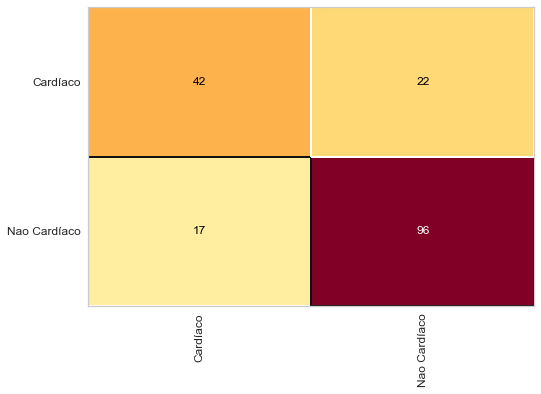

In [24]:
# Gerando a matriz de confusão
cm=ConfusionMatrix(naive_bayse)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [25]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

    Cardíaco       0.71      0.66      0.68        64
Nao Cardíaco       0.81      0.85      0.83       113

    accuracy                           0.78       177
   macro avg       0.76      0.75      0.76       177
weighted avg       0.78      0.78      0.78       177



## Decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
# Making the decision the decision tree
arvore_decisao=DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_decisao.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
#previsions
previsoes=arvore_decisao.predict(X_teste)
previsoes

array(['Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Cardíaco', 'Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Cardíaco', 'Nao Cardíaco',
       'Cardíaco', 'Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Cardíaco',
       'Nao Cardíaco', 'Cardíaco', 'Nao Cardíaco', 'Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Cardíaco', 'Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Cardíaco', 'Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Nao Cardíaco', 'Cardíaco', 'Nao Cardíaco', 'Nao Cardíaco',
       'Cardíaco', 'Cardíaco', 'Nao Cardíaco', 'Cardíaco', 'Nao Cardíaco',
       'Nao Cardíaco', 'Nao Cardíaco', 'Cardíaco',

In [29]:
round(accuracy_score(y_teste, previsoes),2)

0.7

0.7005649717514124

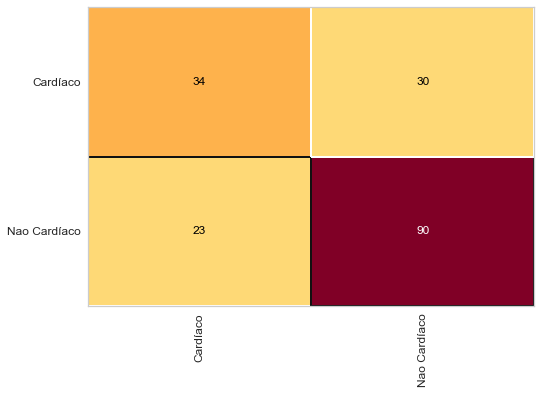

In [30]:
# Gerando a matriz de confusão
cm=ConfusionMatrix(arvore_decisao)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [31]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

    Cardíaco       0.60      0.53      0.56        64
Nao Cardíaco       0.75      0.80      0.77       113

    accuracy                           0.70       177
   macro avg       0.67      0.66      0.67       177
weighted avg       0.69      0.70      0.70       177



In [32]:
arvore_decisao.feature_importances_

array([0.01721449, 0.02203996, 0.01662911, 0.01160624, 0.0154342 ,
       0.16349193, 0.        , 0.03396987, 0.02132243, 0.06590794,
       0.0064407 , 0.21580687, 0.17056351, 0.23957274])

In [33]:
arvore_decisao.classes_

array(['Cardíaco', 'Nao Cardíaco'], dtype=object)

In [34]:
features

array([[0.0, 1.0, 0.0, ..., 0.8125, 0.2592592592592593,
        0.45112781954887216],
       [0.0, 1.0, 0.0, ..., 0.1875, 0.35185185185185186,
        0.8872180451127818],
       [1.0, 0.0, 0.0, ..., 0.27083333333333337, 0.35185185185185186,
        0.7744360902255638],
       ...,
       [0.0, 1.0, 0.0, ..., 0.7083333333333333, 0.6111111111111109,
        0.518796992481203],
       [1.0, 0.0, 0.0, ..., 0.5416666666666667, 0.32407407407407396,
        0.6390977443609023],
       [0.0, 1.0, 0.0, ..., 0.7083333333333333, 0.2592592592592593,
        0.18045112781954886]], dtype=object)

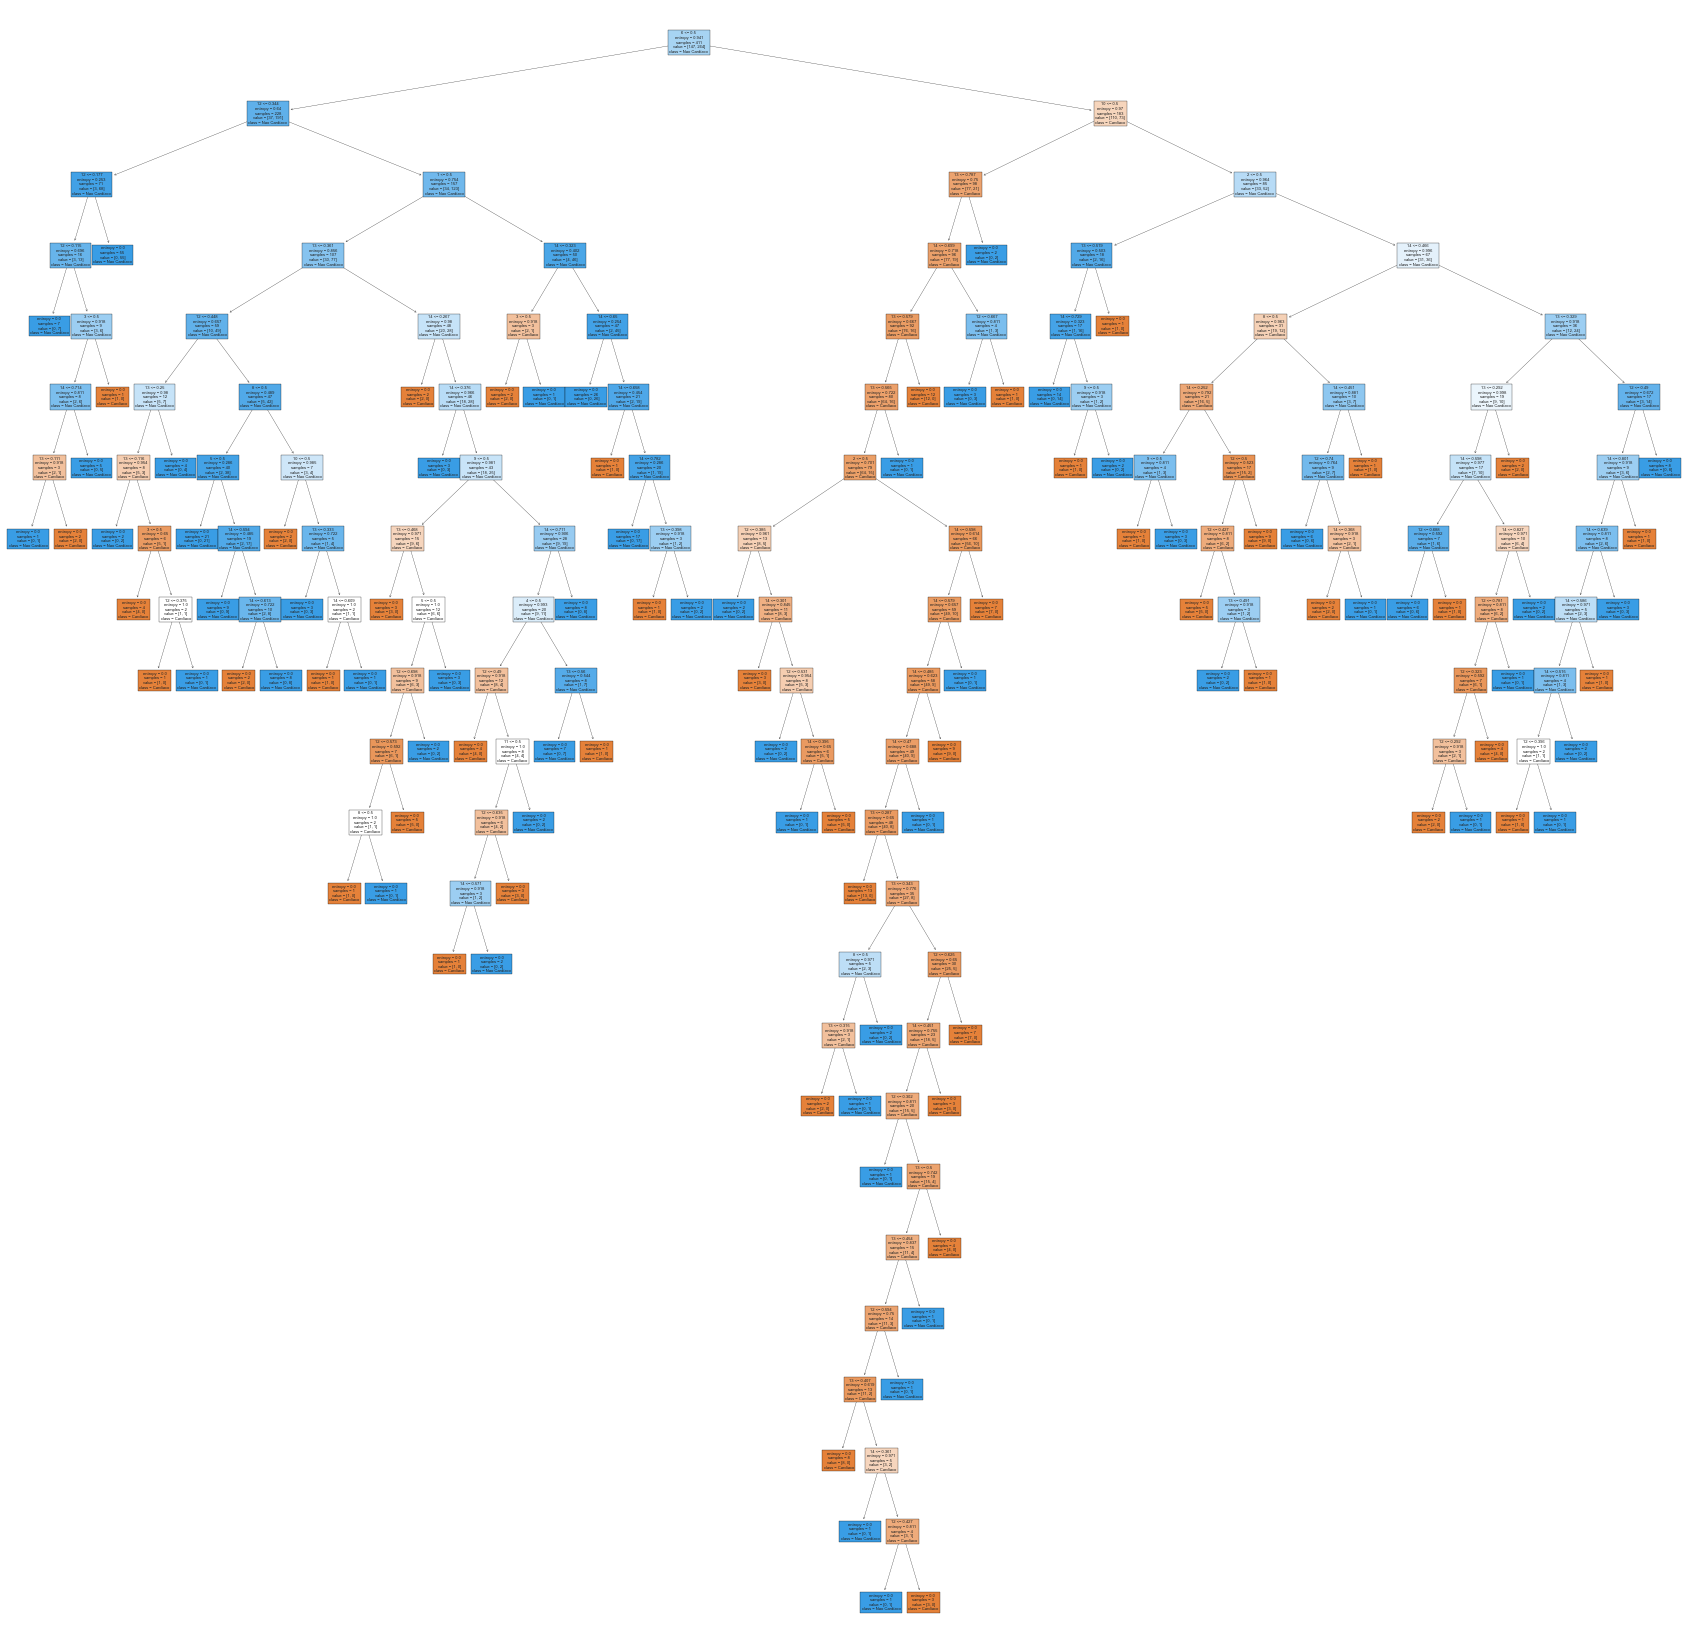

In [35]:
from sklearn import tree
previsores = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']
figura, eixos = plt.subplots(nrows = 1, ncols = 1, figsize=(30,30))
tree.plot_tree(arvore_decisao, feature_names=previsores, class_names = arvore_decisao.classes_, filled = True)
figura.savefig('arvore_decisao.png');

## Randon forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Creating model
random_forest=RandomForestClassifier(n_estimators=10,criterion='gini', random_state=0, min_samples_split=2, min_samples_leaf=10)
random_forest.fit(X_treinamento, y_treinamento)

RandomForestClassifier(min_samples_leaf=10, n_estimators=10, random_state=0)

In [26]:
import joblib
joblib.dump(random_forest, 'random_forest.plk')

['random_forest.plk']

In [38]:
# Previsions
previsoes=random_forest.predict(X_teste)

In [39]:
accuracy_score(y_teste,previsoes)
#45=0.76
#10=0.75
#100=0.77
#70=0.78

0.7796610169491526

0.7796610169491526

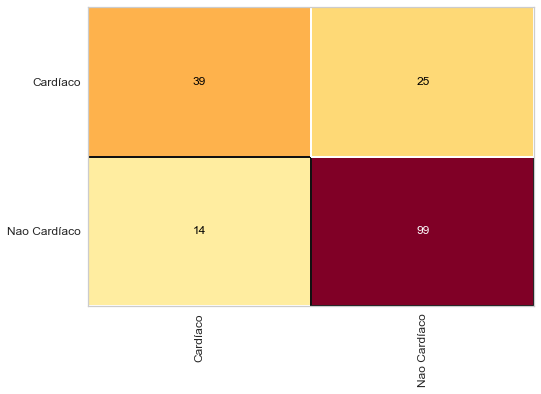

In [40]:
cm=ConfusionMatrix(random_forest)
cm.fit(X_treinamento,y_treinamento)
cm.score(X_teste, y_teste)

In [41]:
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

    Cardíaco       0.74      0.61      0.67        64
Nao Cardíaco       0.80      0.88      0.84       113

    accuracy                           0.78       177
   macro avg       0.77      0.74      0.75       177
weighted avg       0.78      0.78      0.77       177



## Knn

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_treinamento, y_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [44]:
previsoes=neigh.predict(X_teste)

In [45]:
accuracy_score(y_teste,previsoes)
#5=0.76
#3=0.76
#10=0.80

0.807909604519774

0.807909604519774

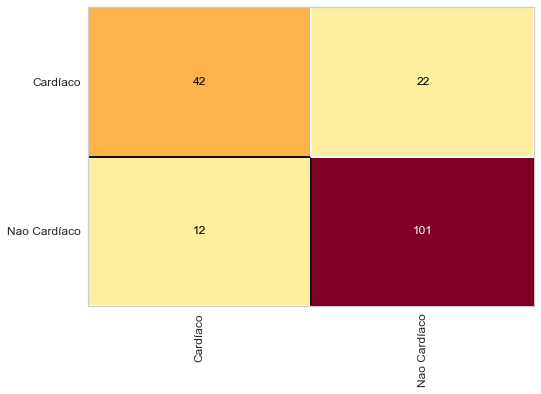

In [46]:
cm=ConfusionMatrix(neigh)
cm.fit(X_treinamento,y_treinamento)
cm.score(X_teste, y_teste)

In [47]:
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

    Cardíaco       0.78      0.66      0.71        64
Nao Cardíaco       0.82      0.89      0.86       113

    accuracy                           0.81       177
   macro avg       0.80      0.78      0.78       177
weighted avg       0.81      0.81      0.80       177



## Logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
clf = LogisticRegression(random_state=0).fit(X_treinamento,y_treinamento)
previsoes = clf.predict(X_teste)
accuracy_score(y_teste,previsoes)

0.7966101694915254

0.7966101694915254

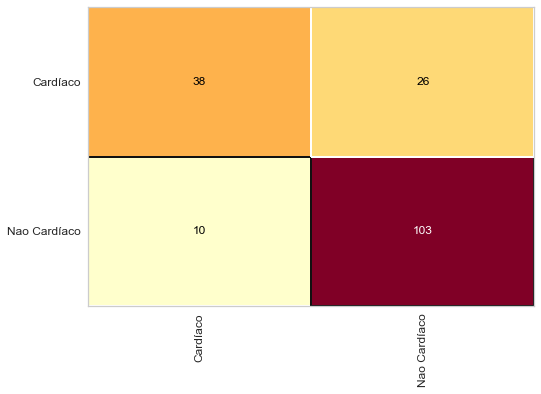

In [50]:
cm=ConfusionMatrix(clf)
cm.fit(X_treinamento,y_treinamento)
cm.score(X_teste, y_teste)

In [51]:
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

    Cardíaco       0.79      0.59      0.68        64
Nao Cardíaco       0.80      0.91      0.85       113

    accuracy                           0.80       177
   macro avg       0.80      0.75      0.76       177
weighted avg       0.80      0.80      0.79       177



In [52]:
clf.intercept_, clf.coef_

(array([1.25679782]),
 array([[ 0.69279384, -0.69296966, -0.23470722,  0.75437077,  0.39792398,
         -0.91776335, -0.12615779,  0.11721322,  0.00876876,  0.69129705,
         -0.69147287, -0.72465385, -1.0398427 ,  0.92531628]]))

## SVM

In [53]:
from sklearn.svm import SVC
# Creating and training the model
svm_model=SVC(kernel='rbf', random_state=1, C=1.0)
svm_model.fit(X_treinamento, y_treinamento)
previsoes=svm_model.predict(X_teste)
accuracy_score(y_teste, previsoes)

0.8022598870056498

0.8022598870056498

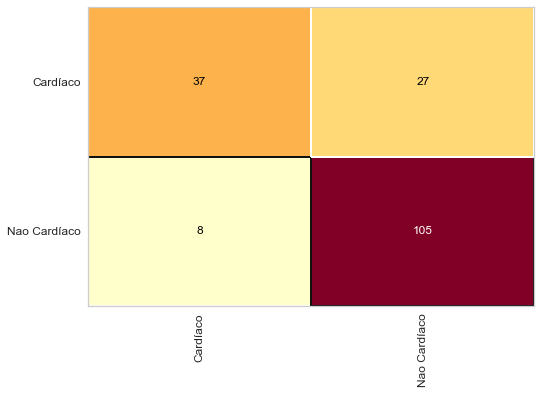

In [54]:
cm=ConfusionMatrix(svm_model)
cm.fit(X_treinamento,y_treinamento)
cm.score(X_teste, y_teste)

In [55]:
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

    Cardíaco       0.82      0.58      0.68        64
Nao Cardíaco       0.80      0.93      0.86       113

    accuracy                           0.80       177
   macro avg       0.81      0.75      0.77       177
weighted avg       0.81      0.80      0.79       177



# Parameters tuning

In [56]:
from sklearn.model_selection import GridSearchCV
X_features = np.concatenate((X_treinamento,X_teste),axis=0)
y_targets=np.concatenate((y_treinamento,y_teste), axis=0)

## Decision tree

In [57]:
parametros={'criterion':['gini','entropy'],
            'splitter': ['best','random'],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,5,10]}

grid_search=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parametros)
grid_search.fit(X_features, y_targets)
melhores_parametros=grid_search.best_params_
melhor_resultado=grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 10, 'splitter': 'random'}
0.7841083586846299


## Random forest

In [58]:
parametros={'criterion':['gini','entropy'],
            'n_estimators': [10,40, 100, 150],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,5,10]}

grid_search=GridSearchCV(estimator=RandomForestClassifier(),param_grid=parametros)
grid_search.fit(X_features, y_targets)
melhores_parametros=grid_search.best_params_
melhor_resultado=grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 10}
0.7874981891931044


## Knn classifier

In [59]:
parametros={'weights':['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size':[20,25,30,35,40]}

grid_search=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parametros)
grid_search.fit(X_features, y_targets)
melhores_parametros=grid_search.best_params_
melhor_resultado=grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'algorithm': 'auto', 'leaf_size': 20, 'weights': 'distance'}
0.7517890772128061


## Logistic regression

In [60]:
parametros = {'tol':[0.0001,0.00001,0.000001],
              'C':[1.0,1.5,2.0],
              'solver':['lbfgs','sag','saga']}

grid_search=GridSearchCV(estimator=LogisticRegression(),param_grid=parametros)
grid_search.fit(X_features, y_targets);
melhores_parametros=grid_search.best_params_;
melhor_resultado=grid_search.best_score_;
print(melhores_parametros)
print(melhor_resultado)

C:\Users\rodol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rodol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rodol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rodol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rodol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rodol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

{'C': 1.5, 'solver': 'lbfgs', 'tol': 0.0001}
0.7806605823554976


C:\Users\rodol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rodol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rodol\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [61]:
print("{'C': 1.5, 'solver': 'lbfgs', 'tol': 0.0001},0.7806605823554976")

{'C': 1.5, 'solver': 'lbfgs', 'tol': 0.0001},0.7806605823554976


## SVM

In [62]:
parametros = {'tol':[0.0001,0.00001,0.000001],
              'C':[1.0,1.5,2.0],
              'kernel':['rbf','linear','poly','sigmoid'],
              'random_state':[1,2,3]}

grid_search=GridSearchCV(estimator=SVC(),param_grid=parametros)
grid_search.fit(X_features, y_targets);
melhores_parametros=grid_search.best_params_;
melhor_resultado=grid_search.best_score_;
print(melhores_parametros)
print(melhor_resultado)

{'C': 2.0, 'kernel': 'linear', 'random_state': 1, 'tol': 0.0001}
0.7755758365927858


# Cross validation

In [63]:
from sklearn.model_selection import cross_val_score, KFold

In [64]:
resultado_arvore=[]
resultado_random=[]
resultado_knn=[]
resultado_regressao_logistica=[]
resultado_SVM=[]

for i in range(30):
    Kfold=KFold(n_splits=10, shuffle=True, random_state=i)
    
    arvore=DecisionTreeClassifier(criterion='entropy', min_samples_leaf= 5, min_samples_split= 2, splitter='random')
    scores=cross_val_score(arvore,X_features, y_targets, cv=Kfold)
    resultado_arvore.append(scores.mean())
    
    random=RandomForestClassifier(criterion= 'gini', min_samples_leaf= 10, min_samples_split= 10, n_estimators= 10)
    scores=cross_val_score(random,X_features, y_targets, cv=Kfold)
    resultado_random.append(scores.mean())
    
    neighbor=KNeighborsClassifier(algorithm= 'auto', leaf_size= 20, weights= 'distance')
    scores=cross_val_score(neighbor,X_features, y_targets, cv=Kfold)
    resultado_knn.append(scores.mean())
    
    logistica=LogisticRegression(C= 1.5, solver= 'lbfgs', tol=0.0001)
    scores=cross_val_score(logistica,X_features, y_targets, cv=Kfold)
    resultado_regressao_logistica.append(scores.mean())
    
    svm=SVC(C= 2.0, kernel= 'linear',tol= 0.0001)
    scores=cross_val_score(svm,X_features, y_targets, cv=Kfold)
    resultado_SVM.append(scores.mean())

In [65]:
resultados=pd.DataFrame({'Arvore':resultado_arvore,
                         'Random_forest':resultado_random,
                         'Knn':resultado_knn,
                         'Regressao_logistica':resultado_regressao_logistica,
                         'SVM':resultado_SVM })
resultados

,Arvore,Random_forest,Knn,Regressao_logistica,SVM
0,0.780684,0.773875,0.760257,0.770485,0.753507
1,0.780655,0.787493,0.766978,0.768761,0.753477
2,0.767008,0.792607,0.760286,0.777294,0.758679
3,0.748568,0.782554,0.758708,0.763793,0.768819
4,0.770631,0.794389,0.753594,0.770485,0.760345
5,0.756926,0.772268,0.753302,0.765634,0.753682
6,0.739714,0.775541,0.729340,0.770310,0.758533
7,0.766861,0.778872,0.758358,0.766978,0.755056
8,0.760462,0.775687,0.753594,0.760374,0.767066
9,0.770339,0.792548,0.751724,0.761864,0.755202


In [66]:
resultados.describe()

,Arvore,Random_forest,Knn,Regressao_logistica,SVM
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.765392,0.781898,0.757601,0.767029,0.760807
std,0.012826,0.007596,0.008203,0.004916,0.005730
min,0.739714,0.768732,0.729340,0.756838,0.751695
25%,0.757335,0.775986,0.753529,0.763764,0.755216
50%,0.766920,0.780538,0.758445,0.767008,0.760359
75%,0.770565,0.787259,0.763472,0.770449,0.766409
max,0.789334,0.801198,0.770456,0.777294,0.772238


In [67]:
# Varience observation
resultados.var()

Arvore                 0.000165
Random_forest          0.000058
Knn                    0.000067
Regressao_logistica    0.000024
SVM                    0.000033
dtype: float64

In [68]:
# Varience coeficient. 
(resultados.std()/resultados.mean())*100

Arvore                 1.675740
Random_forest          0.971457
Knn                    1.082739
Regressao_logistica    0.640923
SVM                    0.753121
dtype: float64

# Testing data normality

In [69]:
from scipy.stats import shapiro
alpha=0.05
shapiro(resultado_arvore), shapiro(resultado_random), shapiro(resultado_regressao_logistica), shapiro(resultado_SVM)
# The results bigger than alpha value hevan't significative statistic difference.  

(ShapiroResult(statistic=0.974781334400177, pvalue=0.6762862801551819),
 ShapiroResult(statistic=0.9558892250061035, pvalue=0.2423504889011383),
 ShapiroResult(statistic=0.9734143614768982, pvalue=0.6361517310142517),
 ShapiroResult(statistic=0.9481908679008484, pvalue=0.15118126571178436))

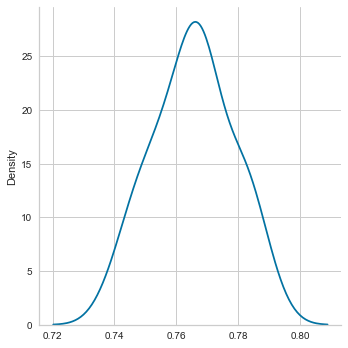

In [70]:
sns.displot(resultado_arvore, kind='kde');

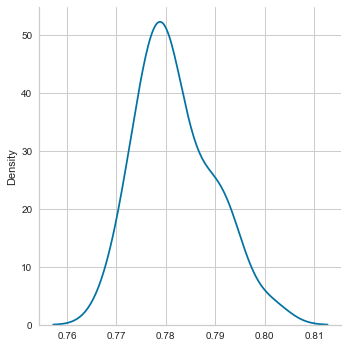

In [71]:
sns.displot(resultado_random,kind='kde');

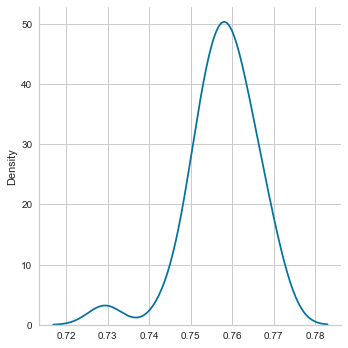

In [72]:
sns.displot(resultado_knn,kind='kde');

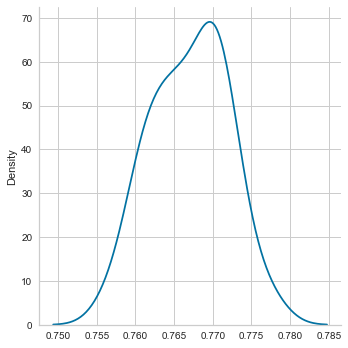

In [73]:
sns.displot(resultado_regressao_logistica,kind='kde');

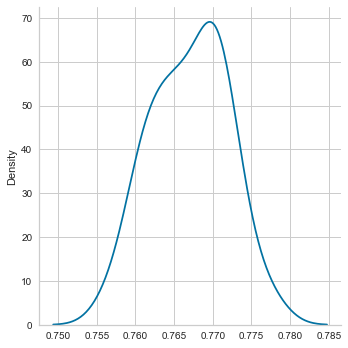

In [74]:
sns.displot(resultado_regressao_logistica,kind='kde');

# ANOVA test and Tukey test

In [75]:
from scipy.stats import f_oneway
p = f_oneway(resultado_arvore, resultado_random,resultado_knn,resultado_regressao_logistica,resultado_SVM)
print(p[1])
if p[1]<= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Os dados são iguais')

1.1136015474388812e-21
Hipótese nula rejeitada. Dados são diferentes


In [76]:
resultaodos_algoritmos={'accuracy':np.concatenate([resultado_arvore, resultado_random,resultado_knn,resultado_regressao_logistica,resultado_SVM]),
                        'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                                      'arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                                      'arvore','arvore','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random',
                                      'random','random','random','random','random','random','random','random','random','random','random','random','random','random','random',
                                      'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                                      'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                                      'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                                      'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                                      'logistica','logistica','logistica','logistica','logistica','logistica','logistica','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                                      'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm']}
resultados_df=pd.DataFrame(resultaodos_algoritmos)

In [77]:
resultados_df.head()

,accuracy,algoritmo
0,0.780684,arvore
1,0.780655,arvore
2,0.767008,arvore
3,0.748568,arvore
4,0.770631,arvore


In [78]:
from statsmodels.stats.multicomp import MultiComparison
compara_algoritmos=MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])
teste_estatistico=compara_algoritmos.tukeyhsd()
print(teste_estatistico)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
   arvore       knn  -0.0078 0.0036 -0.0137 -0.0019   True
   arvore logistica   0.0016  0.941 -0.0043  0.0076  False
   arvore    random   0.0165    0.0  0.0106  0.0224   True
   arvore       svm  -0.0046 0.2118 -0.0105  0.0014  False
      knn logistica   0.0094 0.0002  0.0035  0.0154   True
      knn    random   0.0243    0.0  0.0184  0.0302   True
      knn       svm   0.0032 0.5697 -0.0027  0.0091  False
logistica    random   0.0149    0.0  0.0089  0.0208   True
logistica       svm  -0.0062 0.0349 -0.0122 -0.0003   True
   random       svm  -0.0211    0.0  -0.027 -0.0152   True
----------------------------------------------------------


In [79]:
resultados.mean()

Arvore                 0.765392
Random_forest          0.781898
Knn                    0.757601
Regressao_logistica    0.767029
SVM                    0.760807
dtype: float64

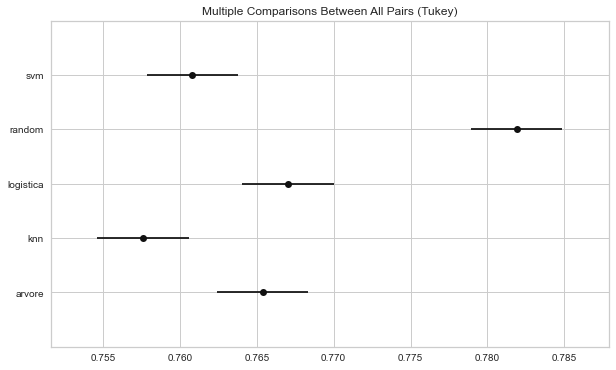

In [80]:
teste_estatistico.plot_simultaneous();